<a href="https://colab.research.google.com/github/rajniyadavashish/Twitter_assignment/blob/main/Twitter_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Twitter Assignment - ASHISH YADAV

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# %cd /content/drive/MyDrive/project_sentiment

In [ ]:
!pip install git+https://github.com/tweepy/tweepy.git
!pip3 install -U textblob
!python -m textblob.download_corpora
import tweepy
import webbrowser
import time
import json
import os
import pandas as pd
import logging
from logging.handlers import RotatingFileHandler
from sys import getsizeof


  Running command git clone -q https://github.com/tweepy/tweepy.git 'C:\Users\TeamA\AppData\Local\Temp\pip-req-build-m4lsh4s3'
  ERROR: Error [WinError 2] The system cannot find the file specified while executing command git clone -q https://github.com/tweepy/tweepy.git 'C:\Users\TeamA\AppData\Local\Temp\pip-req-build-m4lsh4s3'
ERROR: Cannot find command 'git' - do you have 'git' installed and in your PATH?



  Cloning https://github.com/tweepy/tweepy.git to c:\users\teama\appdata\local\temp\pip-req-build-m4lsh4s3
Finished.


[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\TeamA\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\TeamA\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\TeamA\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\TeamA\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to
[nltk_data]     C:\Users\TeamA\AppData\Roaming\nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\TeamA\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!

## Stage-1
Your program should prompt the user to input the keyword.
You're going to write tweet JSON object per LINE in the log file. Each line can then be parsed individually.
After successfully storing data in log files, your program should print following statistics in the console after termination

Time taken to run the program

Average size (in bytes) of a tweet JSON

Number of log files created to store data

Average number of records in a log file

Average size (in KB) of a log file

In [ ]:
# enter your api keys
consumer_key = "7ZkKRWwXya9KKZvNdBHDlHz3Z"
consumer_secret = "d949135a8XGpgQVyXFIfZHJz7oNItzq8o1qrQTdCZOpoMjPwZ3"

In [ ]:
callback_uri = 'oob' # https://cfe.sh/twitter/callback

In [ ]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret, callback_uri)
redirect_url = auth.get_authorization_url()
print(redirect_url)

https://api.twitter.com/oauth/authorize?oauth_token=1Qwk_QAAAAABWjOsAAABfbhBRGY


In [ ]:
webbrowser.open(redirect_url)

True

In [ ]:
user_pin_input = input("What's the pin value? ")

What's the pin value?  1156620


In [ ]:
user_pin_input

'1156620'

In [ ]:
auth.get_access_token(user_pin_input)

('1300687822505103360-xCfdbd82Xt5DzA6gOvqBQhYpnboGzJ',
 '8up0HdKPIvg5Gww5kSr4MEBdEUnXb2btkgn8jwqBVULBB')

In [ ]:
print(auth.access_token, auth.access_token_secret)

1300687822505103360-xCfdbd82Xt5DzA6gOvqBQhYpnboGzJ 8up0HdKPIvg5Gww5kSr4MEBdEUnXb2btkgn8jwqBVULBB


In [ ]:
api = tweepy.API(auth, wait_on_rate_limit=True)

In [ ]:
query = input("Enter a keyword to search") #enter the keyword to search about

Enter a keyword to search covid-19


In [ ]:
#set the number of max tweets to analyse
#using only 10k tweets since scraping 100k tweets takes 8hrs
max_tweets=10000
geo='38.8950368,-77.0365427,250km' # washington dc geocode 
searched_tweets = [status._json for status in tweepy.Cursor(api.search_tweets,q=query,lang='en',geocode = geo).items(max_tweets)]
json_strings = [json.dumps(json_obj) for json_obj in searched_tweets]

Rate limit reached. Sleeping for: 752
Rate limit reached. Sleeping for: 807
Rate limit reached. Sleeping for: 807


In [ ]:
len(json_strings)

10000

In [ ]:
# finding the size of a single tweet in kb
tweetsize=0
avg_tweetsize=0
no_of_tweet=len(json_strings)
for i in json_strings:
    tweetsize+=getsizeof(i)

avg_tweetsize=tweetsize/no_of_tweet
print(avg_tweetsize)

3154.8539


In [ ]:
# changing the dirctory
%cd C:/Users/TeamA/Desktop/Twitter_Project/extracted

C:\Users\TeamA\Desktop\Twitter_Project\extracted


In [ ]:
# Storing the data and splitting the files (Max file size is 1MB (Juptyter notebook limitation))

logger = logging.getLogger('my_logger')
logger.setLevel(logging.DEBUG)
handler = RotatingFileHandler('my_log', maxBytes=1000000, backupCount=100)
logger.addHandler(handler)

for i in range(len(json_strings)):
    logger.info(json_strings[i])

In [ ]:
#finding the number of tweets per file
def tweet_count(filename):

    file = open(filename)
    Counter = 0

    # Reading from file
    Content = file.read()
    CoList = Content.split("\n")

    for i in CoList:
        if i:
            Counter += 1

    return Counter # returns number of records per file

In [ ]:

directory_path = 'C:/Users/TeamA/Desktop/Twitter_Project/extracted'
No_of_files = len(os.listdir(directory_path))

In [ ]:
#finding the file size
files = os.listdir(directory_path)

for f in files:
    tweet_count(f)
    file_size = os.path.getsize(f)
    print('Size of ',f, 'is', file_size, 'bytes')

Size of  my_log is 128219 bytes
Size of  my_log.1 is 998749 bytes
Size of  my_log.10 is 998838 bytes
Size of  my_log.11 is 998556 bytes
Size of  my_log.12 is 998715 bytes
Size of  my_log.13 is 997668 bytes
Size of  my_log.14 is 998832 bytes
Size of  my_log.15 is 997509 bytes
Size of  my_log.16 is 998086 bytes
Size of  my_log.17 is 999271 bytes
Size of  my_log.18 is 999981 bytes
Size of  my_log.19 is 997393 bytes
Size of  my_log.2 is 998278 bytes
Size of  my_log.20 is 998863 bytes
Size of  my_log.21 is 997547 bytes
Size of  my_log.22 is 999916 bytes
Size of  my_log.23 is 1000000 bytes
Size of  my_log.24 is 999360 bytes
Size of  my_log.25 is 998993 bytes
Size of  my_log.26 is 995705 bytes
Size of  my_log.27 is 997279 bytes
Size of  my_log.28 is 999165 bytes
Size of  my_log.29 is 998446 bytes
Size of  my_log.3 is 997581 bytes
Size of  my_log.30 is 997341 bytes
Size of  my_log.31 is 998044 bytes
Size of  my_log.4 is 997633 bytes
Size of  my_log.5 is 999961 bytes
Size of  my_log.6 is 997411

In [ ]:
totaltweet =0
total_file_size=0
for f in files:
    totaltweet+=tweet_count(f)
    file_size = os.path.getsize(f)
    total_file_size+=file_size
    
avgtweetcnt=totaltweet/No_of_files
avg_file_size=total_file_size/No_of_files


In [ ]:
print('Average size (in bytes) of a tweet JSON : ',avg_tweetsize)
print('Number of log files created to store data : ',No_of_files)
print('Average number of records in a log file :',avgtweetcnt)
print('Average size (in KB) of a log file :',avg_file_size*0.001)

Average size (in bytes) of a tweet JSON :  3154.8539
Number of log files created to store data :  32
Average number of records in a log file : 312.5
Average size (in KB) of a log file : 971.20434375


## Stage - 2
You're going to write a new JSON object per LINE in the log file. Each line can then be parsed individually.
After successfully storing data in log files, your program should print following statistics in the console after termination

Time taken to run the program

Average size (in bytes) of a new JSON

Minimum and maximum size of new JSON objects

Number of log files created to store data

Average number of records in a log file

Average size (in KB) of a log file

Count of URLs removed

In [ ]:
#reading the log file
import pandas as pd
with open("my_log.1") as fh:
    tweets = [json.loads(line) for line in fh if line]

df = pd.DataFrame(tweets)

In [ ]:
df.head(2)

,created_at,id,id_str,text,truncated,entities,metadata,source,in_reply_to_status_id,in_reply_to_status_id_str,...,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,lang,quoted_status_id,quoted_status_id_str,quoted_status,extended_entities
0,Wed Dec 08 13:45:12 +0000 2021,1468577402108485645,1468577402108485645,@Samanth98034050 @akheriaty No data? WTH? As o...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/#!/download/ipad"" ...",1.468576e+18,1468575720054079492,...,0,0,False,False,False,en,NaN,NaN,NaN,NaN
1,Wed Dec 08 13:45:10 +0000 2021,1468577394315440136,1468577394315440136,VIDEO | Del. COVID-19 Cases Rise; Latest Trend...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://buffer.com"" rel=""nofollow"">Bu...",NaN,None,...,0,0,False,False,False,en,NaN,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 328 entries, 0 to 327
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   created_at                 328 non-null    object 
 1   id                         328 non-null    int64  
 2   id_str                     328 non-null    object 
 3   text                       328 non-null    object 
 4   truncated                  328 non-null    bool   
 5   entities                   328 non-null    object 
 6   metadata                   328 non-null    object 
 7   source                     328 non-null    object 
 8   in_reply_to_status_id      42 non-null     float64
 9   in_reply_to_status_id_str  42 non-null     object 
 10  in_reply_to_user_id        44 non-null     float64
 11  in_reply_to_user_id_str    44 non-null     object 
 12  in_reply_to_screen_name    44 non-null     object 
 13  user                       328 non-null    object 

In [ ]:
# Emoji_removal 
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [ ]:
#stop word removal
from gensim.parsing.preprocessing import remove_stopwords
def stopwordrev(text):
    filtered_sentence = remove_stopwords(text)
    return(filtered_sentence)

In [ ]:
#processing the Raw Tweet
import re
import string
def clean_text(text):
    """Make text lowercase, 
       remove text in angle brackets,
       remove \n,
       remove punctuation and 
       remove words containing numbers."""
    # lower case
    text = str(text).lower() 
    
    # remove text in angle brackets
    text = re.sub('<.*?>+', '', text).strip()
    
    # remove punctuation
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text).strip()
    
    #remove newline character
    text = re.sub('\n', ' ', text).strip()
    
    # remove words containing numbers
    text = re.sub('\w*\d\w*', '', text).strip()
    
    #Remove URLs from a text string
    text= re.sub(r"http\S+", "", text)

    # remove reserved word
    text= re.sub(r"RT","", text).strip()
    text= re.sub(r"FAV","", text).strip()
    
    text = remove_emoji(text)
    text = stopwordrev(text)
    
    return text

In [ ]:
df['tidytweet'] = df['text'].apply(clean_text)

In [ ]:
df['tidytweet'][0]

'akheriaty data wth october nearly million doses vaccines sa…'

In [ ]:
#tokenization
import spacy

nlp = spacy.load('en_core_web_sm')

def cleaner(string):
    
    # Generate list of tokens
    doc = nlp(string)
    lemmas = [token.lemma_ for token in doc]
    # Remove tokens that are not alphabetic 
    a_lemmas = [lemma for lemma in lemmas if lemma.isalpha() 
                 or lemma == '-PRON-'] 
    # Print string after text cleaning
    return a_lemmas

In [ ]:
df['tokenizedTweet']=df['tidytweet'].apply(cleaner)

In [ ]:
df['tokenizedTweet'].head()

0    [akheriaty, datum, wth, october, nearly, milli...
1                [video, del, case, rise, late, trend]
2    [world, health, organization, announce, wednes...
3    [gate, think, acute, phase, pandemic, despite,...
4    [covid, vax, mandate, come, kid, attend, schoo...
Name: tokenizedTweet, dtype: object

In [ ]:
# finding the list of mentions in the tweet
def mentions(text):
    regex=re.compile(r"(?<=^|(?<=[^a-zA-Z0-9-_\.]))@([A-Za-z]+[A-Za-z0-9]+)")
    result = regex.findall(text)
    return result

In [ ]:
# finding the list of hashtags in the tweet
def hashtags(text):
    regex=re.compile(r"(?<=^|(?<=[^a-zA-Z0-9-_\.]))#([A-Za-z]+[A-Za-z0-9]+)")
    result = regex.findall(text)
    return result

In [ ]:
df['listMentions']=df['text'].apply(mentions)

In [ ]:
df['listHashtags']=df['text'].apply(hashtags)

In [ ]:
df['tweetId']=df['id']
df['rawTweet']=df['text']
df['countRetweets']=df['retweet_count']
df['placeName']=df['place']

In [ ]:
df_cleaned=df[['tweetId','rawTweet','tidytweet','tokenizedTweet','listMentions','listHashtags','countRetweets','placeName']]

In [ ]:
df_cleaned.head()

,tweetId,rawTweet,tidytweet,tokenizedTweet,listMentions,listHashtags,countRetweets,placeName
0,1468577402108485645,@Samanth98034050 @akheriaty No data? WTH? As o...,akheriaty data wth october nearly million dose...,"[akheriaty, datum, wth, october, nearly, milli...","[Samanth98034050, akheriaty]",[],0,None
1,1468577394315440136,VIDEO | Del. COVID-19 Cases Rise; Latest Trend...,video del cases rise latest trends,"[video, del, case, rise, late, trend]",[],[],0,None
2,1468577161183326208,The World Health Organization (WHO) announced ...,world health organization announced wednesday ...,"[world, health, organization, announce, wednes...",[],[],0,None
3,1468576567949471744,Bill Gates thinks the 'acute phase' of COVID-1...,gates thinks acute phase pandemic despite emer...,"[gate, think, acute, phase, pandemic, despite,...",[],[],0,None
4,1468576286624866306,Covid vax mandates coming for kids to attend s...,covid vax mandates coming kids attend school d...,"[covid, vax, mandate, come, kid, attend, schoo...",[],[],0,None


In [ ]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 328 entries, 0 to 327
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweetId         328 non-null    int64 
 1   rawTweet        328 non-null    object
 2   tidytweet       328 non-null    object
 3   tokenizedTweet  328 non-null    object
 4   listMentions    328 non-null    object
 5   listHashtags    328 non-null    object
 6   countRetweets   328 non-null    int64 
 7   placeName       2 non-null      object
dtypes: int64(2), object(6)
memory usage: 20.6+ KB


In [ ]:
# storing the cleaned records in json format
d = df_cleaned.to_dict(orient='records')
j = json.dumps(d)

In [ ]:
cleaned_json_list=[json.dumps(json_obj) for json_obj in d]

In [ ]:
cleaned_json_list[0]

'{"tweetId": 1468577402108485645, "rawTweet": "@Samanth98034050 @akheriaty No data? WTH? As of October 2021, nearly 405 million doses of the vaccines have been sa\\u2026 https://t.co/eA4t8uBBYi", "tidytweet": "akheriaty data wth october nearly million doses vaccines sa\\u2026", "tokenizedTweet": ["akheriaty", "datum", "wth", "october", "nearly", "million", "dose", "vaccine", "sa"], "listMentions": ["Samanth98034050", "akheriaty"], "listHashtags": [], "countRetweets": 0, "placeName": null}'

In [ ]:
%cd C:/Users/TeamA/Desktop/Twitter_Project/cleansed

C:\Users\TeamA\Desktop\Twitter_Project\cleansed


In [ ]:
# splitting and saving the cleaned data in log files
count_row = df.shape[0]
logger = logging.getLogger('my_logger_cleaned')
logger.setLevel(logging.DEBUG)
handler = RotatingFileHandler('my_log_cleaned', maxBytes=1000000, backupCount=100)
logger.addHandler(handler)

for i in range(count_row):
    logger.info(cleaned_json_list[i])

In [ ]:
#changing the directory
directory_path = 'C:/Users/TeamA/Desktop/Twitter_Project/cleansed'
No_of_files = len(os.listdir(directory_path))

In [ ]:
files = os.listdir(directory_path)

for f in files:
    tweet_count(f)
    file_size = os.path.getsize(f)
    print('Size of file', f,'is', file_size, 'bytes')

Size of file my_log_cleaned is 152322 bytes


In [ ]:
totaltweet =0
total_file_size=0
for f in files:
    totaltweet+=tweet_count(f)
    file_size = os.path.getsize(f)
    total_file_size+=file_size
    
avgtweetcnt=totaltweet/No_of_files
avg_file_size=total_file_size/No_of_files


In [ ]:
print('Average size (in bytes) of cleaned tweet JSON : ',avg_tweetsize)
print('Number of new log files created to store data : ',No_of_files)
print('Average number of records in cleaned log file :',avgtweetcnt)
print('Average size (in KB) of a log file :',avg_file_size*0.001)

Average size (in bytes) of cleaned tweet JSON :  3154.8539
Number of new log files created to store data :  1
Average number of records in cleaned log file : 328.0
Average size (in KB) of a log file : 152.322


## Stage-3

Problem A - Generate Word count

In [ ]:
#finding the word count and saving it to csv
path='C:/Users/TeamA/Desktop/Twitter_Project/wordcounts/'
def cleansed_csv(file):
    with open(file+'') as fh:
        tweets = [json.loads(line) for line in fh if line]
    df = pd.DataFrame(tweets)
    wordcount = df['tidytweet'].str.split(expand=True).stack().value_counts().reset_index()
    wordcount.columns = ['Word', 'Frequency']
    return wordcount.to_csv(path+'_'+file+'.csv')

In [ ]:
directory_path = 'C:/Users/TeamA/Desktop/Twitter_Project/cleansed'
for f in files:
    cleansed_csv(f)

### Problem C - Sentiment Analysis and its distribution

In [ ]:
#sentiment analysis of the tweets
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
twtsnt = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\TeamA\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
df_cleaned['score'] = df_cleaned['tidytweet'].apply(lambda review: twtsnt.polarity_scores(review))


C:\Users\TeamA\AppData\Local\Temp/ipykernel_2288/2130666309.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['score'] = df_cleaned['tidytweet'].apply(lambda review: twtsnt.polarity_scores(review))


In [ ]:
df_scores=df_cleaned[['tidytweet','score']]

In [ ]:
df_scores['compound']  = df_scores['score'].apply(lambda score_dict: score_dict['compound'])

C:\Users\TeamA\AppData\Local\Temp/ipykernel_2288/3060321930.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_scores['compound']  = df_scores['score'].apply(lambda score_dict: score_dict['compound'])


In [ ]:
df_scores['compound'] = df_scores['compound'].apply(lambda c: 'pos' if c >=0 else 'neg')

C:\Users\TeamA\AppData\Local\Temp/ipykernel_2288/2716455355.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_scores['compound'] = df_scores['compound'].apply(lambda c: 'pos' if c >=0 else 'neg')


In [ ]:
df_scores.head()

,tidytweet,score,compound
0,akheriaty data wth october nearly million dose...,"{'neg': 0.298, 'neu': 0.702, 'pos': 0.0, 'comp...",neg
1,video del cases rise latest trends,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",pos
2,world health organization announced wednesday ...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",pos
3,gates thinks acute phase pandemic despite emer...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",pos
4,covid vax mandates coming kids attend school d...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",pos


In [ ]:

from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt

In [ ]:
#Define a list of stop words
corpus = ' '.join(df_cleaned['tidytweet'].tolist())

def generate_basic_wordcloud(data, title):
    
    cloud = WordCloud(width=400,
                      height=330,
                      max_words=150,
                      colormap='tab20c',
                      collocations=True).generate_from_text(data)
    plt.figure(figsize=(10,8))
    plt.imshow(cloud)
    plt.axis('off')
    plt.title(title, fontsize=13)
    plt.show()

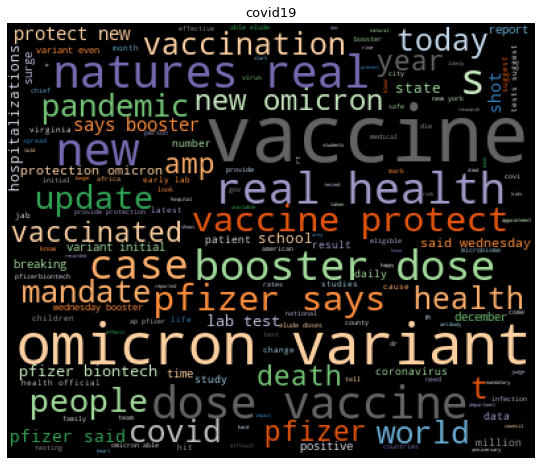

In [ ]:
generate_basic_wordcloud(corpus, 'covid19')